# Deeplab_V3  
- DeepLabv3 is a semantic segmentation architecture that improves upon DeepLabv2 with several modifications. To handle the problem of segmenting objects at multiple scales, modules are designed which employ atrous convolution in cascade or in parallel to capture multi-scale context by adopting multiple atrous rates.
- Rethinking Atrous Convolution for Semantic Image Segmentation  
## introduction:
- 1) The resolution drop caused by continuous pooling or convolution allows DCNN to learn more abstract feature representations. However, spatial invariance hinders the segmentation task because it requires detailed spatial information. In order to solve this problem, DeepLab introduces hole convolution.
- 2) Objects have multiple scales. There are many ways to solve this problem. We mainly consider four categories:
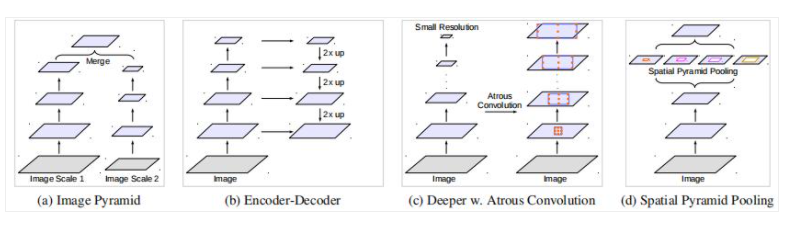
- ① Apply DCNN to the image pyramid to extract the features of different scale inputs, and fuse the prediction results to obtain the final output.
- ② The encoder-decoder structure uses the encoder's multi-scale features to restore the resolution on the decoder.
- ③Add additional modules at the top of the original network to capture long-range information, such as DenseCRF.
- ④SPP spatial pyramid pooling has convolution kernels with different sampling rates and receptive fields, which can capture objects at multiple scales.

**Contributions of DeepLabv3**
> Reviewing the hollow convolution, the receptive field can also be expanded to extract multi-scale information under the framework of cascade modules and pyramid pooling.
 Improved ASPP: It is composed of different sampling rates of hole convolution and BN layers, which are laid out in a cascaded or parallel manner.
 The large sampling rate 3×3 hole convolution cannot capture long-range information due to the image boundary effect, and will degenerate into a 1×1 convolution. We recommend integrating image features into ASPP.
 Explain the training details and methods.
 
**Related work**
- A number of existing works have shown that the interaction between global features or contexts is helpful for semantic segmentation. We discuss four different types of full convolutional networks that use contextual information for semantic segmentation
**Image pyramid** 
- The same model uses shared weights and is suitable for multi-scale input.
- Small-scale input features correspondingly encode long-range semantic information, and large-scale input features correspondingly retain the details of small objects.
- This method transforms the input into multiple scales through the Laplacian pyramid and sends it to the DCNN.
- The main disadvantage is that due to the limitations of GPU storage, it cannot be extended well on larger and deeper DCNNs, which are usually used in the testing phase.

**Encoder-decoder**
The model mainly consists of two parts:  
- 1) Encoder, the dimension of the feature map in this stage is gradually reduced and the deep features are easy to capture remote information.
- 2) Decoder, this stage restores object details and spatial dimensions.
- SegNet、U-Net、RefineNet

**Context module**

- The model contains additional modules to encode remote context information.
DenseCRF  

**Spatial pyramid pooling** 

SPP is used to capture multi-scale context.  
ParseNet、DeepLabv2（ASPP）、PSPNet（PSP）   

DeepLabv3 proposes to use hole convolution as a tool for context module and spatial pyramid pooling.    

**method** 
Review how the hole convolution extracts dense features, discuss the cascade (serial) and parallel layout of the hole convolution module.

**Hole convolution**
See DeepLabv1, v2

**Cascading ResNet** 
Apply the hole convolution to the cascade structure, and connect many cascade modules after the last block (block4) of ResNet.



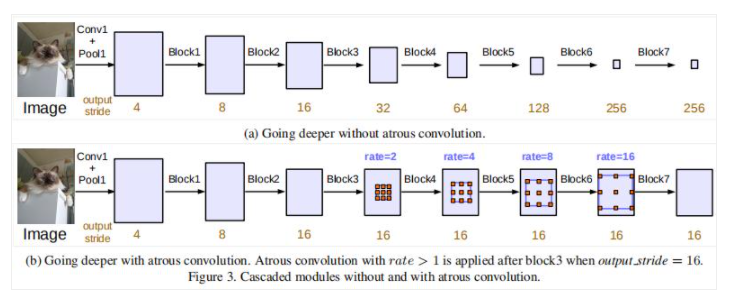
The overall information in Figure (a) is gathered into a very small feature map, and experiments show that it is not conducive to segmentation.    

**Multi-grid Method** 
Define Multi_Gird=(r1,r2,r3) as the unit rates of the three convolutional layers from block4 to block7. Then rates=2⋅(1,2,4)=(2,4,8)

**ASPP+** 
- Add the BN layer to ASPP.    
- When the sampling rate becomes larger, the effective weight of the convolution kernel becomes smaller.     
- On the 65×65 feature map, a 3×3 convolution kernel is used with different sampling rates. When the sampling rate is close to the feature map size, 3×3 degenerates into a 1×1 convolution kernel, and only the weight of the center is effective.

- In order to solve this problem and integrate global context information in the model, we use global pooling for the final feature map, and go through 256 1×1 convolution kernels (BN), and then bilinearly interpolate to the required spatial dimension.

**The final ASPP contains** 
- (A) A 1×1 convolution and three 3×3, rates=(6,12,18), output_stride=16 hole convolutions (256+BN).
- (B) Image-level features. The features are pooled by global average, post-convolution, and then up-sampling.
- The hole convolution of different rates in (a) outputs the same size by controlling different padding, and the size of (a) after upsampling in (b) is the same.
- The results of all branches are concatenated and passed through 1×1 convolution (256+BN), and finally through 1×1 convolution to generate segmentation results.

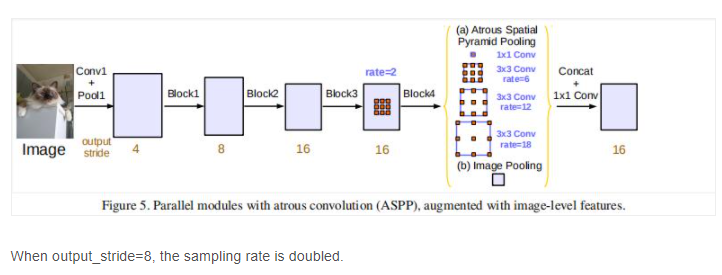